# 回帰分析とは
独立変数 $x$ と従属変数 $y$ の値の組からなるデータセット $D=\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\}$ から、

$$ y= f(x) + \text{(観測誤差)} $$

のような関係式を導出する事を**回帰(regression)**と呼び、このような分析を**回帰分析(regression analysis)**と呼びます。図形的にはデータの分布に曲線や曲面をフィッティングするという問題になります。回帰分析では $f(x)$ の部分は決定的、つまり確率変数ではないと考え、$\text{(観測誤差)}$の項が確率変数であると考えます。

## 問題の例
scikit-leanに標準で用意されているサンプルデータセットである**ボストンの家の価格**を例に説明しましょう。今、興味があるのは

- 家の価格はどのような要因で決まるのか？
- これこれこれの条件を満たす家の価格相場はどれくらいか？

等の問題です。以下では、データ・セットのうち部屋の数と価格をプロットしてみました。すると、直線上に概ね分布している事が判ります。つまり

$$ \text{(価格)} = a\text{(部屋数)} + b + \text{(誤差)} \qquad\text{($a,b$ は定数)} $$

という一次式の関係がありそうです。従って、$a,b$ を求める事がこの場合の回帰分析の目標になります。

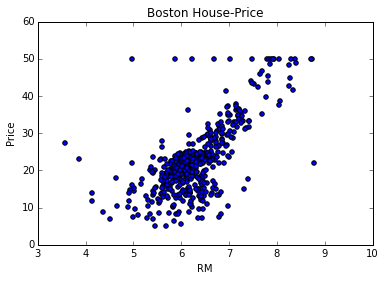

In [2]:
from sklearn.datasets import load_boston
df = load_boston()
scatter(df.data[:, 5], df.target)
title('Boston House-Price')
xlabel(df.feature_names[5])
ylabel('Price')

理論的な説明は後の回にして、ここではツールを使って絵を書いてみます。

In [2]:
from scipy.stats import linregress
# 回帰分析
a, b, _, p, _ = linregress(df.data[:, 5], df.target)
print ('p-value =', p)
print ('a =', a)
print ('b =', b)

# 回帰直線
x = linspace(3, 10)
plot(x, a*x + b)

# 元データ
xlim(3, 10)
ylim(0, 60)
scatter(df.data[:, 5], df.target)
title('Boston House-Price')
xlabel(df.feature_names[5])
ylabel('Price')

NameError: name 'df' is not defined

# 回帰分析の種類
## 単回帰と重回帰
独立変数が一変数である

$$ y=f(x) + \epsilon $$

というモデルによる回帰を**単回帰(single regression)**と呼びます。上で紹介した例は単回帰の問題です。

一方、独立変数が多次元の

$$ y=f(\mathbf{x}) + \epsilon = f(x_1,\ldots,x_m) + \epsilon $$

というモデルによる回帰を**重回帰(multiple regression)**と呼びます。

## パラメトリックとノンパラメトリック

上の例では

$$ y=ax+b + \epsilon$$

というモデルを考えました。$\epsilon$ は誤差項です。この場合 $f(x)$ を求めるという問題はパラメータ $a,b$ を求める問題に帰着します。このように、有限個のパラメータで記述されるモデルを**パラメトリックモデル(parametric model)**と呼びます。パラメトリックモデルは更に**多項式モデル(polynomial model)**や**ロジスティックモデル(logistic model)**等、方程式の形に従って分類されます。

一方、パラメータを用いずに $f(x)$ を表現する方法もあり、これらは**ノンパラメトリックモデル(non parametric model)**と呼ばれます。ノンパラメトリックモデルでは多項式とか三角関数とか関数の形状を限定せずに、モデルを構築する事が出来ます。以下では、先ほどの問題に対してノンパラメトリック回帰分析手法の１つであるカーネル回帰という物を適用した様子を描いてみます。理論は後ほどやります。

In [ ]:
from statsmodels.nonparametric.kernel_regression import KernelReg
# 回帰分析
kr = KernelReg(endog = df.target, exog = df.data[:, 5], var_type='c')

# 回帰直線
x = linspace(3, 10)
plot(x, kr.fit(x)[0])

# 元データ
xlim(3, 10)
ylim(0, 60)
scatter(df.data[:, 5], df.target)
title('Boston House-Price')
xlabel(df.feature_names[5])
ylabel('Price')